In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
# Commodity Prices
dfCommodity = pd.read_csv('../data/commodityPrices.csv')
dfCommodity['date'] = pd.to_datetime(dfCommodity['date'])
dfCommodity = dfCommodity.set_index('date').sort_index()

# Wind Generation
dfWind = pd.read_csv('../data/MISOWindGeneration.csv')
dfWind['date'] = pd.to_datetime(dfWind['date'])
dfWind = dfWind.set_index('date').sort_index()

# Demand
dfLoad = pd.read_csv('../data/MISOActualLoad.csv')
dfLoad['Market Day'] = pd.to_datetime(dfLoad['Market Day'])
dfLoad = dfLoad.set_index('Market Day').sort_index()
dfLoad.index.names = ['date']
dfLoadActual = dfLoad[['Central ActualLoad (MWh)', 'East ActualLoad (MWh)', 'MISO ActualLoad (MWh)', 'Midwest ISO ActualLoad (MWh)', 'North ActualLoad (MWh)', 'South ActualLoad (MWh)', 'West ActualLoad (MWh)']]
dfLoadActual = dfLoadActual.fillna(0)    # Handle NaN

# Merge into a single DataFrame
dfX = pd.merge(dfCommodity, dfWind, left_index=True, right_index=True)
dfX = pd.merge(dfX, dfLoadActual, left_index=True, right_index=True)
dfX.head()

,Central Appalachia,Northern Appalachia,Illinois Basin,Powder River Basin,Uinta Basin,NgPrice,windGenerationMWh,Central ActualLoad (MWh),East ActualLoad (MWh),MISO ActualLoad (MWh),Midwest ISO ActualLoad (MWh),North ActualLoad (MWh),South ActualLoad (MWh),West ActualLoad (MWh)
date,,,,,,,,,,,,,,
2009-07-06,53.333333,51.166667,44,9,44.5,3.355000,325.927083,21654.299167,28127.989583,0,62493.192500,0,0,12710.903750
2009-07-07,53.500000,52.000000,44,9,44.5,3.300000,511.056250,22956.574167,27699.694167,0,63508.234167,0,0,12851.965833
2009-07-08,53.500000,52.000000,44,9,44.5,3.298571,728.637083,22402.212500,27335.640833,0,62295.661250,0,0,12557.807917
2009-07-09,53.500000,52.000000,44,9,44.5,3.297143,1716.773333,23165.527500,28635.972917,0,64392.903333,0,0,12591.402917
2009-07-10,53.500000,52.000000,44,9,44.5,3.295714,837.547917,23676.907917,29816.782083,0,66701.584583,0,0,13207.894583


In [3]:
#LMP
#dfMiso = pd.read_hdf('../data/LMP.h5','lmp')
dfMiso = pd.read_hdf('../data/LMP-ACEI_AMMO.h5','lmp')
dfMiso.index = pd.to_datetime(dfMiso.index)

tsY = dfMiso['meanPrice']     # converted to Pandas.Series
tsY.index = pd.to_datetime(tsY.index)
dfY = pd.DataFrame(tsY)

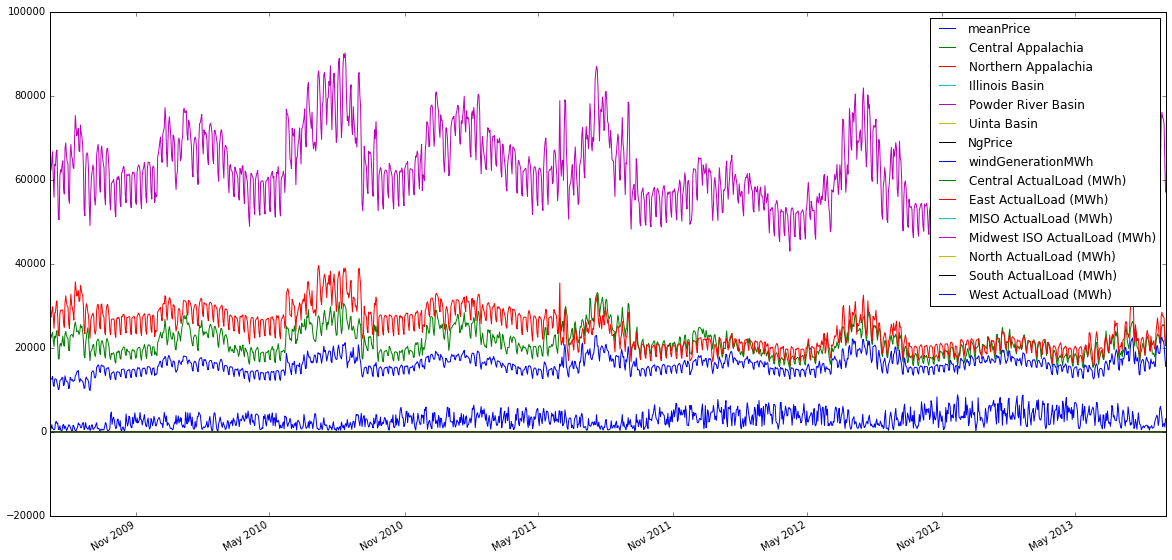

In [4]:
# Combine X and Y
df = pd.merge(dfY, dfX, left_index=True, right_index=True, how='inner')
df = df[:'2013-09-01']
df.plot()

## LMP vs. Commodity Prices

C:\Users\huntington\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


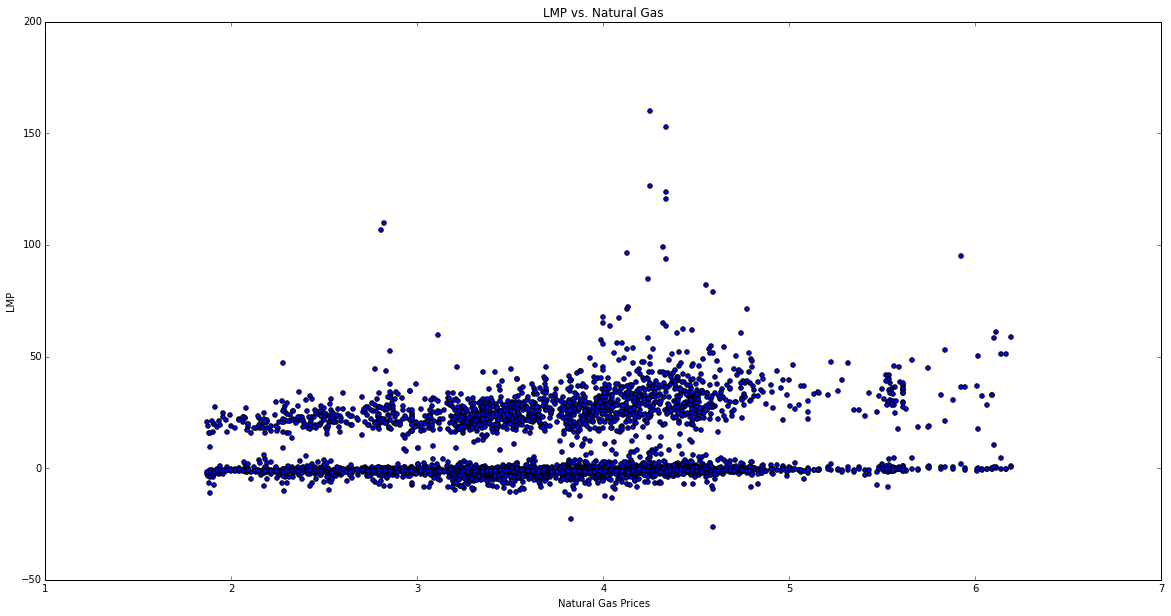

In [5]:
plt.scatter(df['NgPrice'], df['meanPrice'])
plt.xlabel('Natural Gas Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Natural Gas')

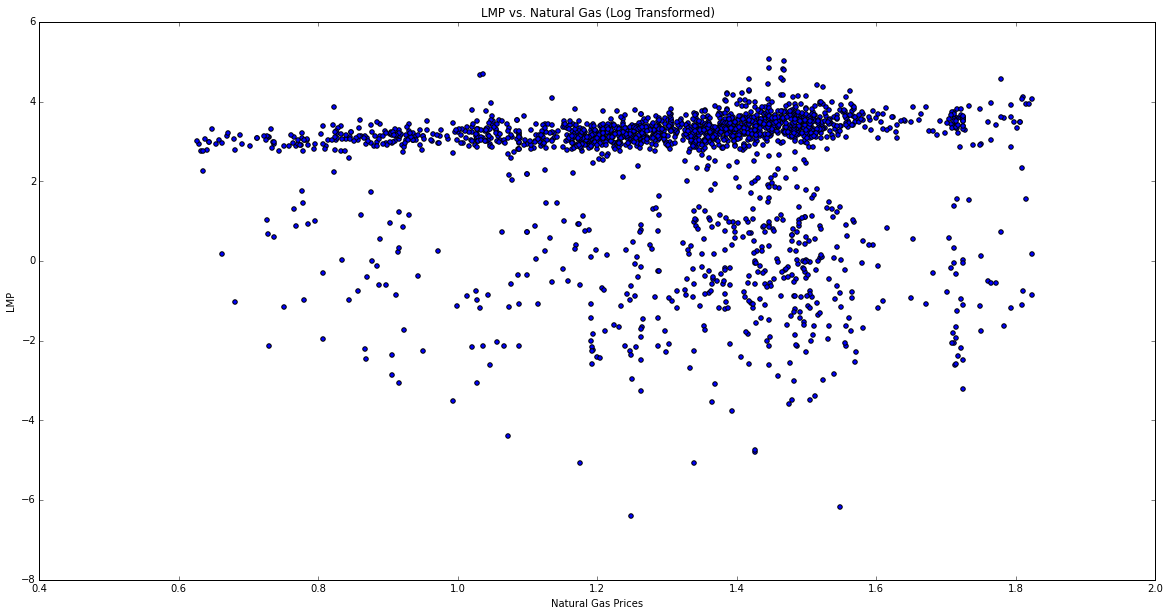

In [8]:
plt.scatter(np.log(df['NgPrice']), np.log(df['meanPrice']))
plt.xlabel('Natural Gas Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Natural Gas (Log Transformed)')

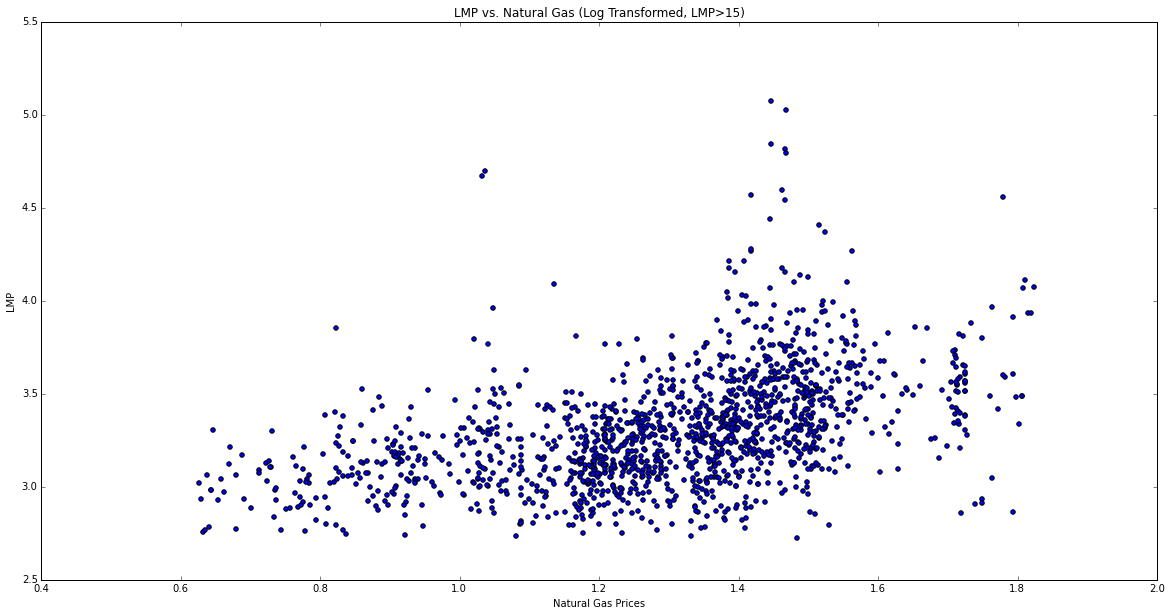

In [9]:
df2 = df[df['meanPrice']>15]
plt.scatter(np.log(df2['NgPrice']), np.log(df2['meanPrice']))
plt.xlabel('Natural Gas Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Natural Gas (Log Transformed, LMP>15)')

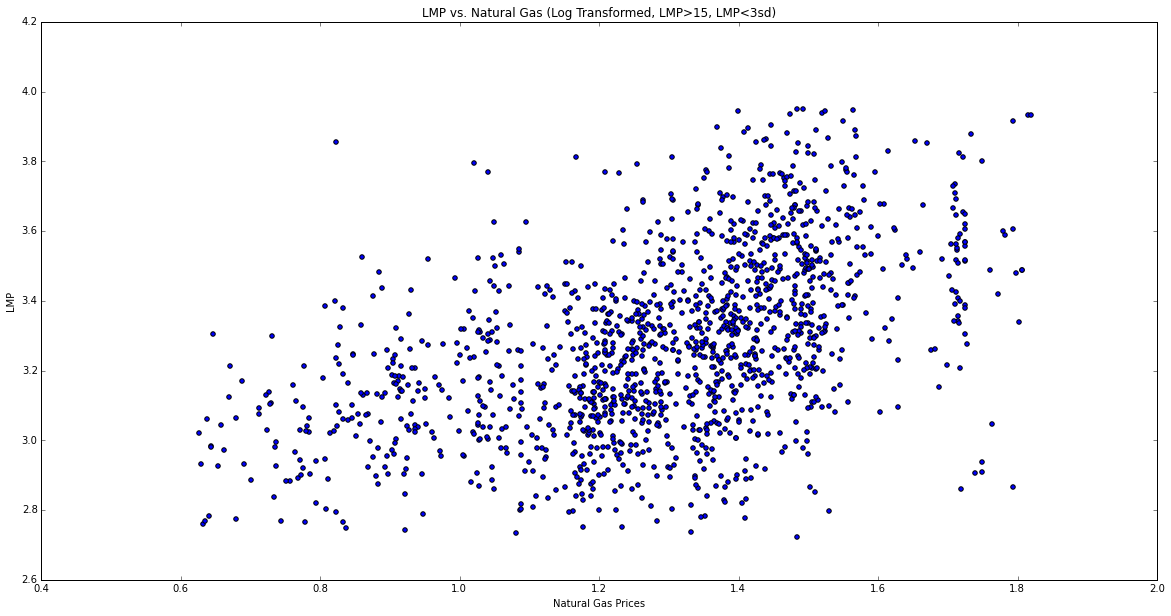

In [10]:
from scipy import stats


df2 = df[df['meanPrice']>15]
df2 = df2[(np.abs(stats.zscore(df2['meanPrice'])) < 2)]

plt.scatter(np.log(df2['NgPrice']), np.log(df2['meanPrice']))
plt.xlabel('Natural Gas Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Natural Gas (Log Transformed, LMP>15, LMP<3sd)')

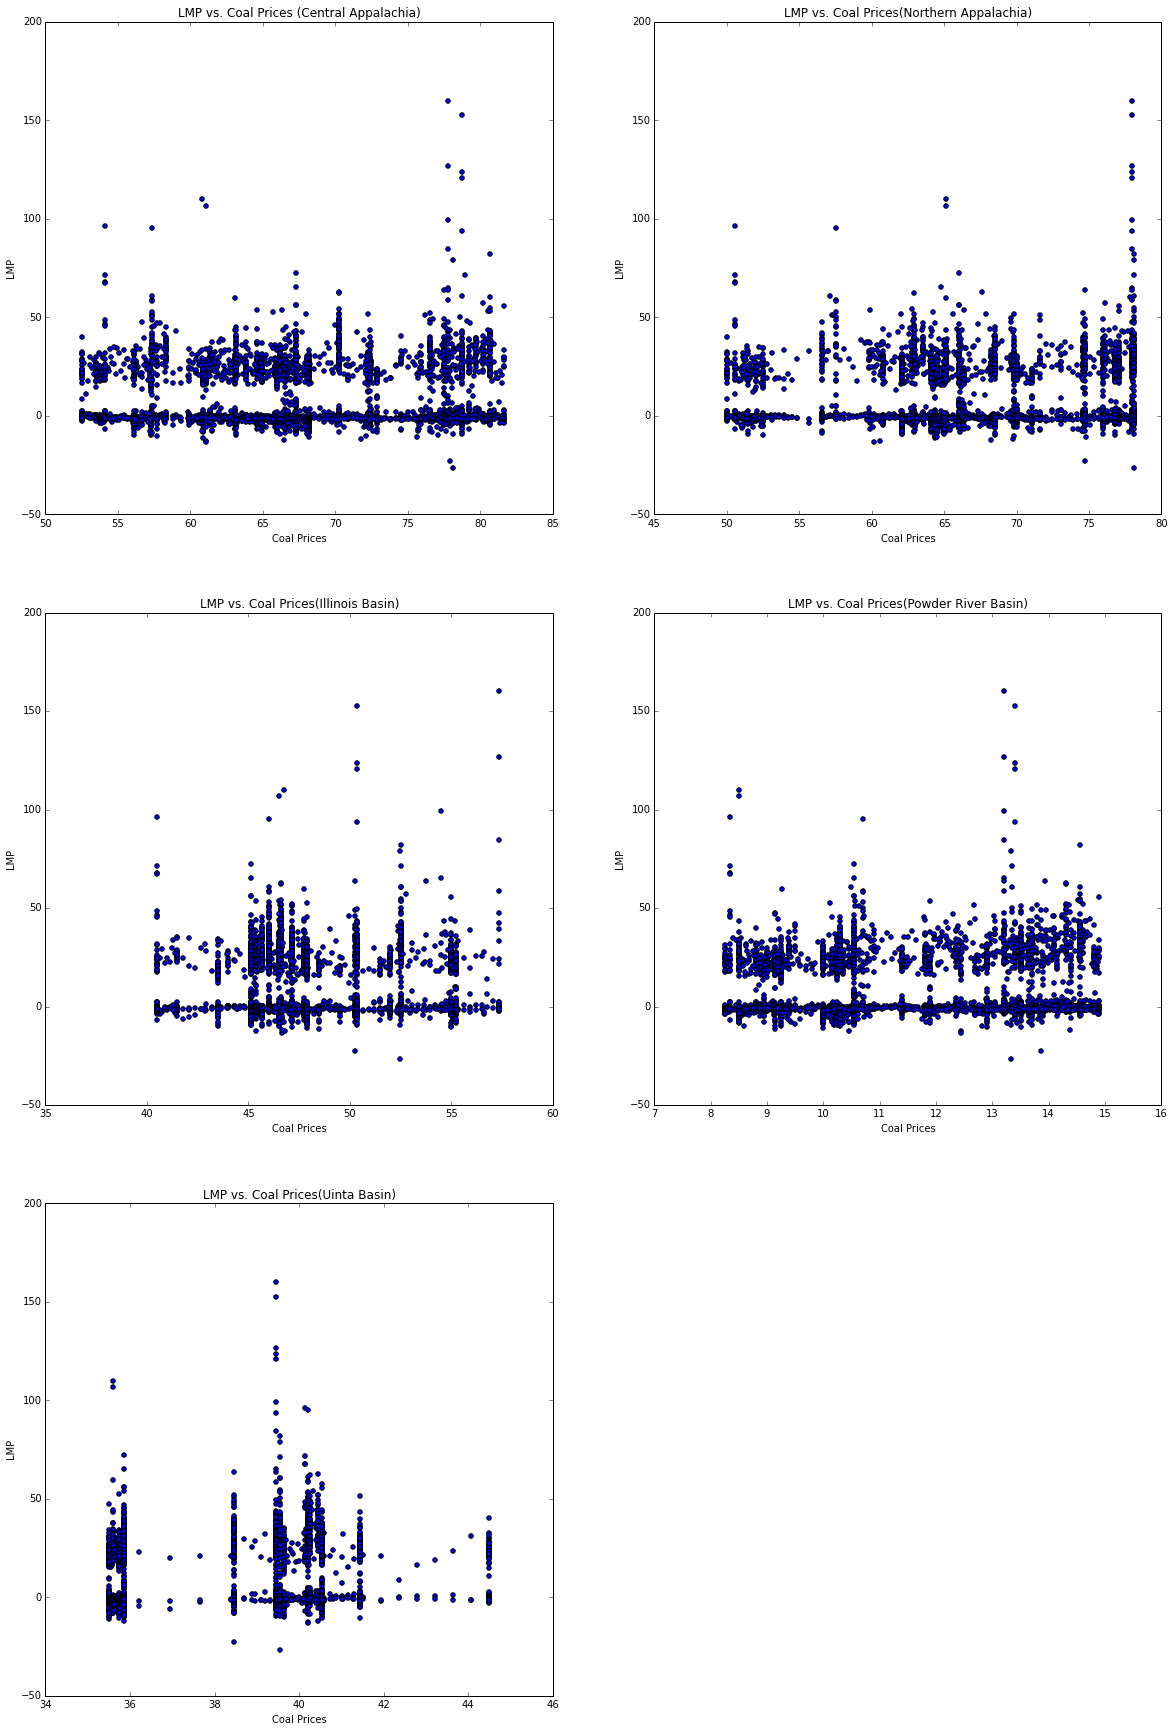

In [11]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(321)
plt.scatter(df['Central Appalachia'], df['meanPrice'])
plt.xlabel('Coal Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Coal Prices (Central Appalachia)')

ax1 = fig.add_subplot(322)
plt.scatter(df['Northern Appalachia'], df['meanPrice'])
plt.xlabel('Coal Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Coal Prices(Northern Appalachia)')

ax1 = fig.add_subplot(323)
plt.scatter(df['Illinois Basin'], df['meanPrice'])
plt.xlabel('Coal Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Coal Prices(Illinois Basin)')

ax1 = fig.add_subplot(324)
plt.scatter(df['Powder River Basin'], df['meanPrice'])
plt.xlabel('Coal Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Coal Prices(Powder River Basin)')

ax1 = fig.add_subplot(325)
plt.scatter(df['Uinta Basin'], df['meanPrice'])
plt.xlabel('Coal Prices')
plt.ylabel('LMP')
plt.title('LMP vs. Coal Prices(Uinta Basin)')